In [2]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
from datetime import date
import numpy as np

In [48]:
#Retrieves data from Yahoo for prices of cryptocurrencies in real time
now=dt.datetime.now()
def get_crypto_prices(ticker):
    data=pd.DataFrame()
    names=list()
    for i in ticker:
        data=pd.concat([data,pdr.get_data_yahoo(symbols=i, start=dt.datetime(2020,1,1), end=now).iloc[:,1]],axis=1)
        names.append(i)
    data.columns=names
    return data
                       
ticks=['BTC-USD','ETH-USD','BNB-USD','SOL-USD','LUNA1-USD','AVAX-USD','ATOM-USD','DOT-USD']
d=get_crypto_prices(ticks)
d.tail()

BTC-USD      ETH-USD     BNB-USD    SOL-USD  \
2022-10-15 00:00:00  19019.250000  1268.468506  267.884827  29.534006   
2022-10-16 00:00:00  19068.914062  1275.005493  268.362305  29.578842   
2022-10-17 00:00:00  19173.333984  1297.447266  270.427338  29.883160   
2022-10-18 00:00:00  19144.769531  1291.660645  270.533203  29.833694   
2022-10-19 00:00:00  19132.921875  1294.931396  270.699860  29.633993   

                     LUNA1-USD   AVAX-USD   ATOM-USD   DOT-USD  
2022-10-15 00:00:00        NaN  15.422195  11.472921  6.037718  
2022-10-16 00:00:00        NaN  15.440785  11.523164  6.052293  
2022-10-17 00:00:00        NaN  15.676973  11.649702  6.137007  
2022-10-18 00:00:00        NaN  15.604382  12.163922  6.087181  
2022-10-19 00:00:00        NaN  15.455412  12.166636  6.081791

In [49]:
#Creates corrleation dataframe 
d.corr()

BTC-USD   ETH-USD   BNB-USD   SOL-USD  LUNA1-USD  AVAX-USD  \
BTC-USD    1.000000  0.898490  0.858423  0.683737   0.597066  0.622325   
ETH-USD    0.898490  1.000000  0.955230  0.885592   0.733768  0.825095   
BNB-USD    0.858423  0.955230  1.000000  0.803966   0.671163  0.744162   
SOL-USD    0.683737  0.885592  0.803966  1.000000   0.752609  0.878824   
LUNA1-USD  0.597066  0.733768  0.671163  0.752609   1.000000  0.886861   
AVAX-USD   0.622325  0.825095  0.744162  0.878824   0.886861  1.000000   
ATOM-USD   0.851503  0.900814  0.860175  0.850058   0.794606  0.854156   
DOT-USD    0.949949  0.784826  0.732469  0.627527   0.427448  0.560009   

           ATOM-USD   DOT-USD  
BTC-USD    0.851503  0.949949  
ETH-USD    0.900814  0.784826  
BNB-USD    0.860175  0.732469  
SOL-USD    0.850058  0.627527  
LUNA1-USD  0.794606  0.427448  
AVAX-USD   0.854156  0.560009  
ATOM-USD   1.000000  0.775045  
DOT-USD    0.775045  1.000000

[Text(0.5, 1.0, 'Heat Map of Crypto Correlation')]

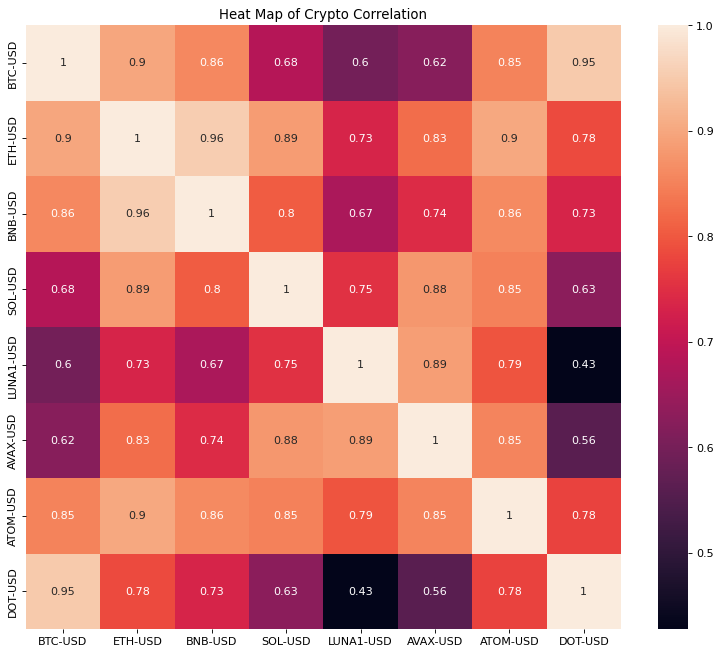

In [50]:
#Plots the correlation dateframe as a heatmap to easily view highly correlated assets
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12,10),dpi=80)
sn.heatmap(d.corr(),annot=True).set(title='Heat Map of Crypto Correlation')

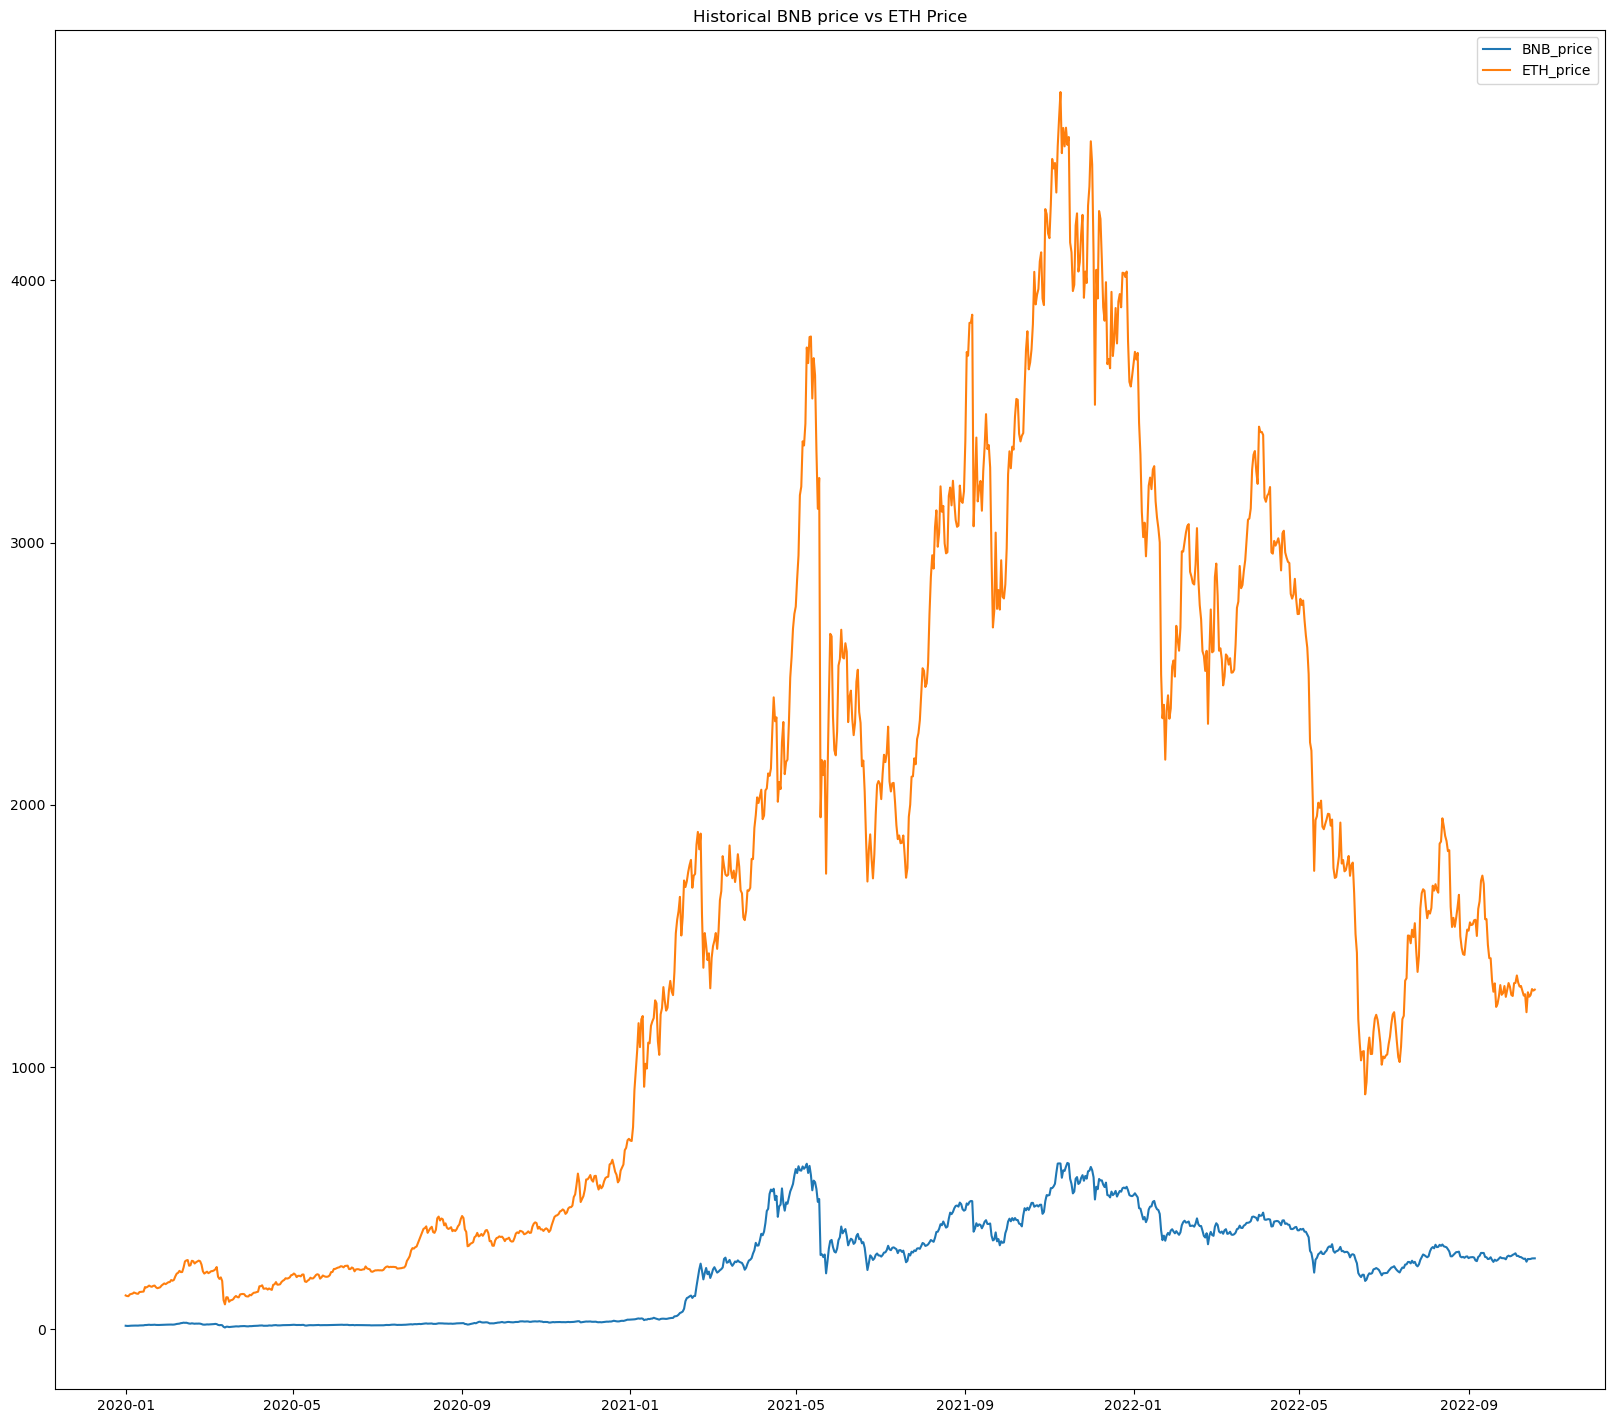

In [6]:
#Plots of the price of ETH and BNB
BNB=d['BNB-USD']
ETH=d['ETH-USD']
figure(figsize=(20,18),dpi=100)
plt.plot(BNB, label='BNB_price')
plt.plot(ETH, label='ETH_price')
plt.title('Historical BNB price vs ETH Price')
plt.legend()

In [8]:
#Retrieves bnb/eth pair price 
bnb_eth=pdr.get_data_yahoo('BNB-ETH',start=dt.datetime(2021,8,14),end=now)
bnb_eth.reset_index(inplace=True)
#gets mean bnb_eth price
mean=bnb_eth.Close.mean()

In [9]:
#Plots BNB/ETH price with rolling averages
figure(figsize=(20, 18), dpi=800)
plt.plot(bnb_eth.Close, label='BNB/ETH ratio')
plt.plot(bnb_eth.Close.rolling(5).mean(), label ='5 day Moving average')
plt.plot(bnb_eth.Close.rolling(20).mean(), label ='20 day Moving average')
plt.plot(bnb_eth.Close.rolling(50).mean(), label ='50 day Moving average')
plt.axhline(mean,color='black')
plt.legend()
plt.title('BNB_ETH Price')

Text(0.5, 1.0, 'BNB_ETH Price')

In [10]:
#Imports stats models to test p value of bnb/eth pair. p-value is under the accpeted threshold of .05 so we can conclude that
#there is correlation between the two assets
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller

results=ts.coint(BNB,ETH)
print('P Value for BNB and Eth is', results[1])
results

P Value for BNB and Eth is 0.13723996423901602


(-2.895284179221417,
 0.13723996423901602,
 array([-3.90718824, -3.3421151 , -3.04860251]))

In [11]:
#Runs the augmented Dickey-Fuller test to determine if the time series data is stationary. In other words to determine if the
#mean price of BNB/ETH stays the same over time. The null hypothesis of the Dickey-Fuller test is equal to 1. So in order to
#accpet the null hypothesis the p-value must be less than .05, and in this case the it is not. Therefore the price of BNB/ETH
#is not stationary and not viable
print('P Value for BNB and ETH is',adfuller(bnb_eth.Close)[1])

P Value for BNB and ETH is 0.7654138789740035


In [12]:
#Creates the upper and lower limits of BNB/ETH using the standard deviation 
lower_limit=bnb_eth.Close.mean()-2*bnb_eth.Close.std()
min_lower=bnb_eth.Close.mean()-bnb_eth.Close.std()
min_upper=bnb_eth.Close.mean()+bnb_eth.Close.std()
upper_limit=bnb_eth.Close.mean()+2*bnb_eth.Close.std()

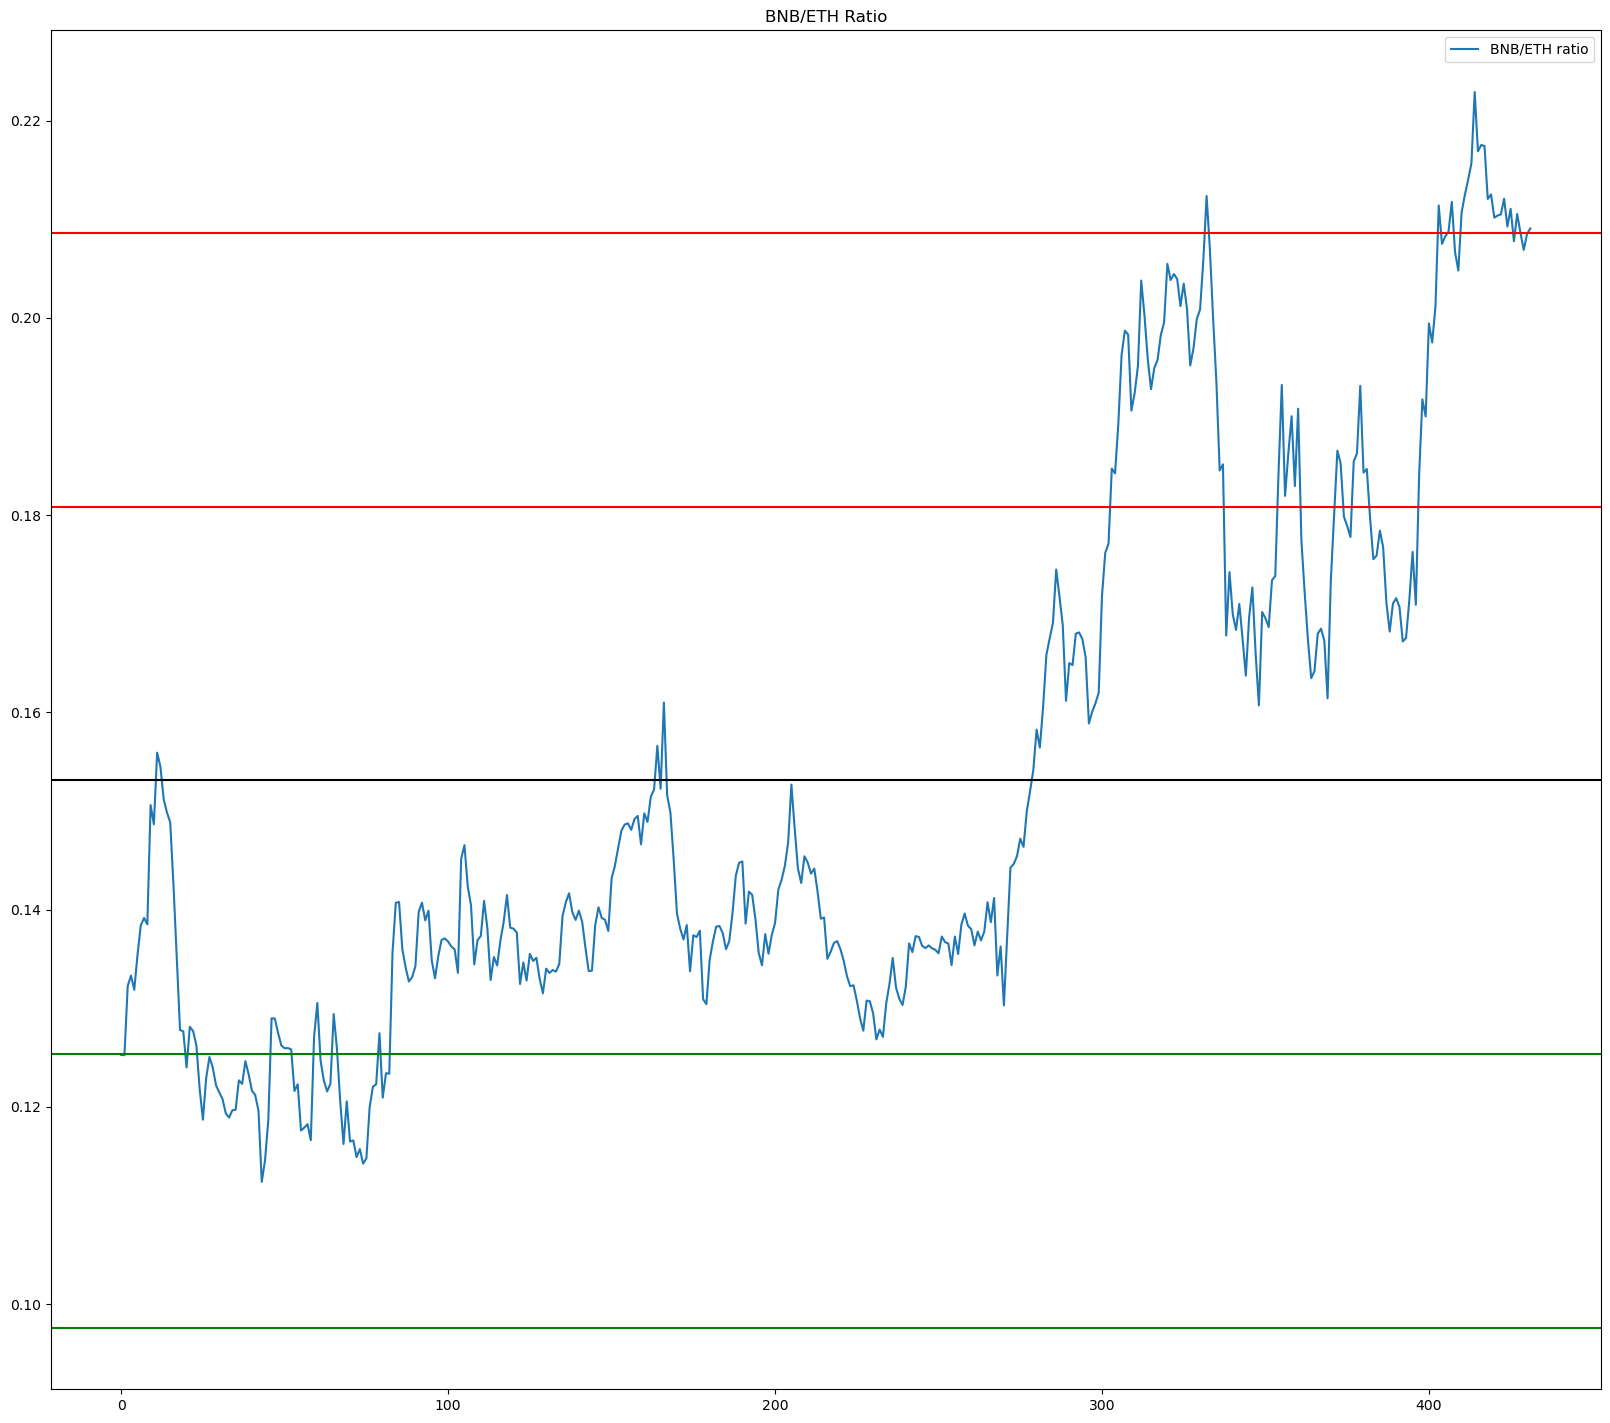

In [13]:
#Plots BNB/ETH price with limits as well as the mean price (in black)
figure(figsize=(20,18),dpi=100)
plt.plot(bnb_eth.Close, label='BNB/ETH ratio')
plt.title('BNB/ETH Ratio')
plt.axhline(lower_limit,color='green')
plt.axhline(min_lower,color='green')
plt.axhline(min_upper, color='red')
plt.axhline(upper_limit, color='red')
plt.axhline(bnb_eth.Close.mean(), color='black')
plt.legend()

In [14]:
#Retrives the price of ATOM
ATOM=d['ATOM-USD']
#Creates ATOM/ETH Pair price
atom_eth=ATOM/ETH

In [16]:
#Prints p-vlaue to determine correlation. P-vlaue falls under .05, we can accept the null hypothesis 
results=ts.coint(ATOM,ETH)
print('P Value for ATOM and ETH is', results[1])

P Value for ATOM and ETH is 0.006616741002083871


In [17]:
#Prints P-vlaue of Dickey Fuller test. Null Hypothesis is accepsted because p value falls under the .05 threshold
print('P Value for ATOM and Eth is',adfuller(atom_eth)[1])

P Value for ATOM and Eth is 0.00014235223795426352


In [18]:
#Creates the upper and lower limits of the ATOM/ETH pair using standard deviation
upper_l=atom_eth.mean()+2*atom_eth.std()
upper_m=atom_eth.mean()+atom_eth.std()
lower_l=atom_eth.mean()-2*atom_eth.std()
lower_m=atom_eth.mean()-atom_eth.std()

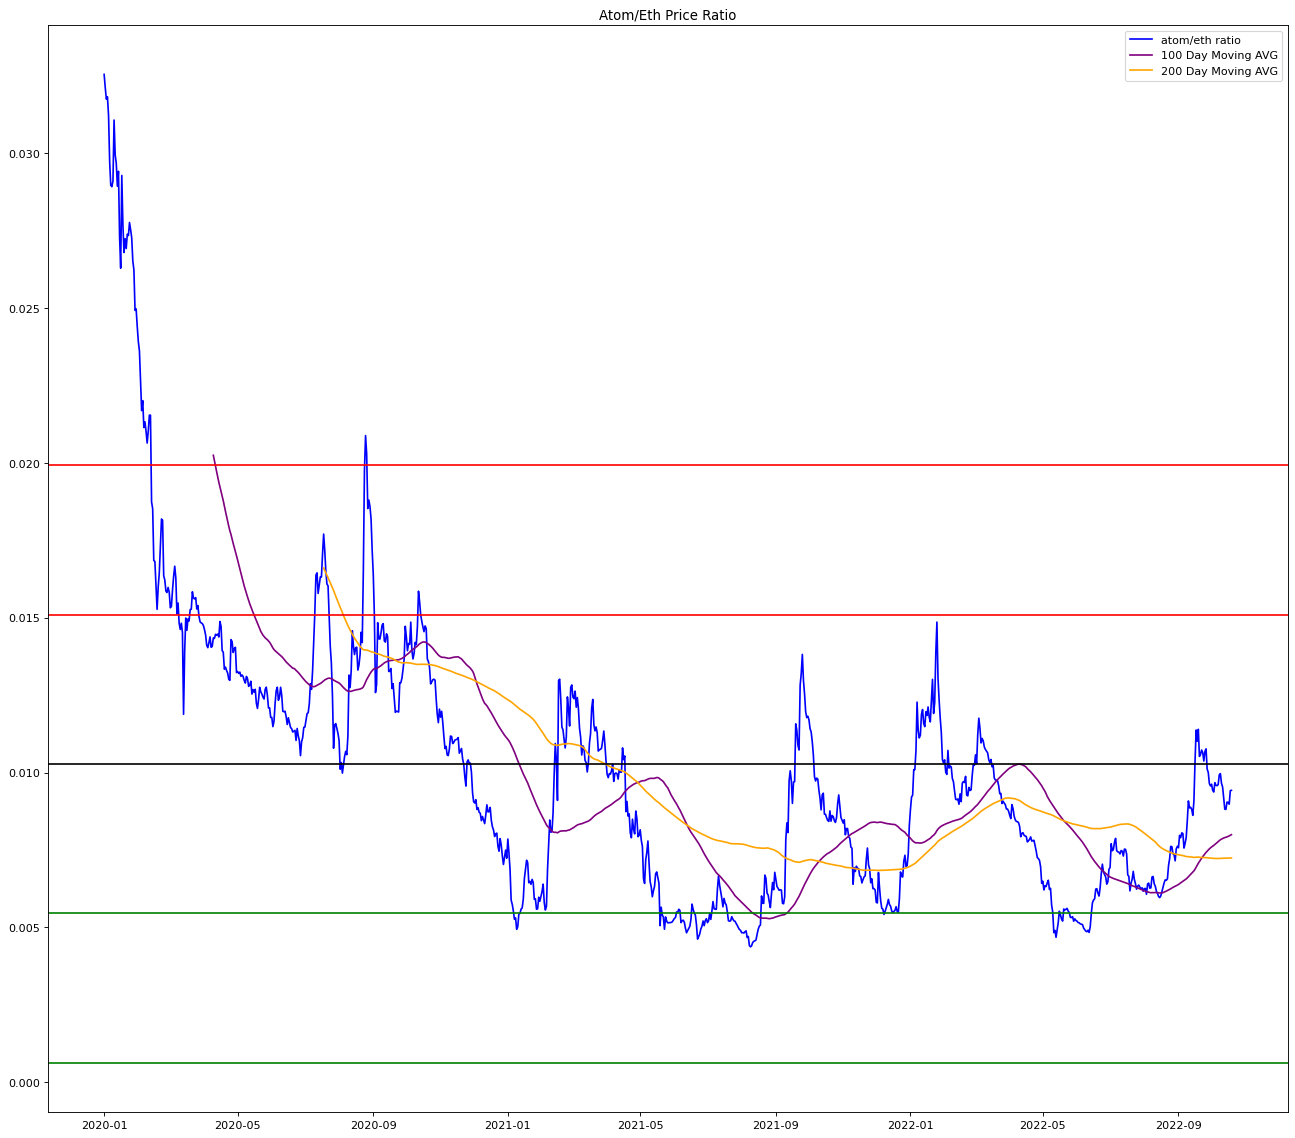

In [19]:
#Plots the ATOM/ETH pair with the upper and lower limits. Chart indicates it would be time to exchaning ETH for ATOM
figure(figsize=(20,18),dpi=80)
plt.plot(atom_eth, color='blue',label='atom/eth ratio')
plt.title('ATOM/ETH Ratio')
plt.plot(atom_eth.rolling(100).mean(), color='purple', label='100 Day Moving AVG')
plt.plot(atom_eth.rolling(200).mean(), color='orange', label='200 Day Moving AVG')
plt.axhline(upper_l,color='red')
plt.axhline(upper_m,color='red')
plt.axhline(lower_m,color='green')
plt.axhline(lower_l,color='green')
plt.axhline(atom_eth.mean(), color='black')
plt.title('Atom/Eth Price Ratio')
plt.legend()

In [27]:
for i, row in d.reset_index().iterrows():
    if i == 951:
        print(f'i={i}')
        print('Returned SOL Price Today')
        print(row['SOL-USD'])
        break

i=951
Returned SOL Price Today
39.94392776489258


In [23]:
len(d)

1023

In [28]:
atom_eth=pd.DataFrame(atom_eth, columns=['Price']).reset_index()

In [29]:
atom_eth.rename(columns={'index':'Date'},inplace=True)

In [30]:
atom_eth['Price'].mean()

0.010275533395409582

In [31]:
atom_eth['Mean_Variance']=atom_eth['Price'].apply(lambda x: x-atom_eth['Price'].mean())
atom_eth['Mean_Threshold']=atom_eth['Price'].apply(lambda x: 1 if x >=atom_eth['Price'].mean() else -1)
atom_eth['Buy_Signal']=atom_eth['Mean_Threshold'].apply(lambda x: 'Buy' if x==-1 else 'Sell')

In [32]:
atom_eth['Mean_Threshold'].value_counts()

-1    577
 1    446
Name: Mean_Threshold, dtype: int64

In [33]:
atom_eth['Buy_Signal'].value_counts()

Buy     577
Sell    446
Name: Buy_Signal, dtype: int64

In [34]:
atom_eth

Date     Price  Mean_Variance  Mean_Threshold Buy_Signal
0    2020-01-01  0.032542       0.022266               1       Sell
1    2020-01-02  0.032119       0.021844               1       Sell
2    2020-01-03  0.031746       0.021470               1       Sell
3    2020-01-04  0.031822       0.021546               1       Sell
4    2020-01-05  0.031217       0.020942               1       Sell
...         ...       ...            ...             ...        ...
1018 2022-10-15  0.009045      -0.001231              -1        Buy
1019 2022-10-16  0.009038      -0.001238              -1        Buy
1020 2022-10-17  0.008979      -0.001297              -1        Buy
1021 2022-10-18  0.009417      -0.000858              -1        Buy
1022 2022-10-19  0.009425      -0.000850              -1        Buy

[1023 rows x 5 columns]

In [35]:
sol=d['SOL-USD'].reset_index()
sol.rename(columns={'index':'Date','SOL-USD':'Price'},inplace=True)
sol.dropna(inplace=True)

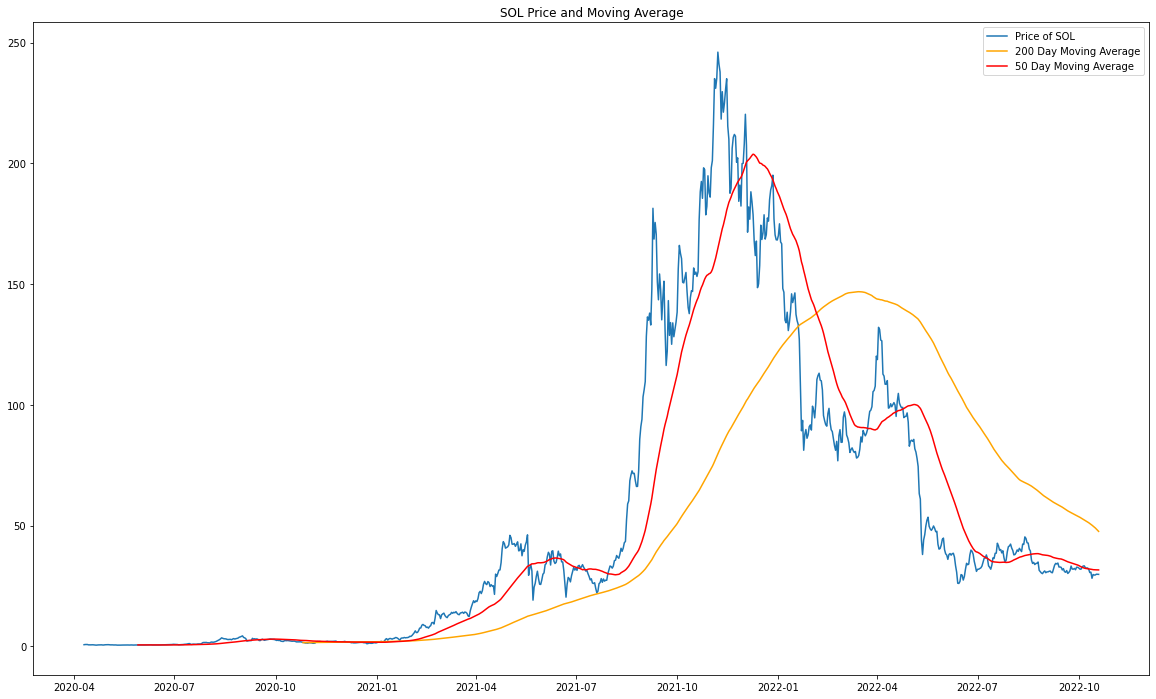

In [36]:
figure(figsize=(20,12))
plt.plot(sol['Date'],sol['Price'],label='Price of SOL')
plt.title('SOL Price and Moving Average')
plt.plot(sol['Date'],sol['Price'].rolling(200).mean(), color='orange',label='200 Day Moving Average')
plt.plot(sol['Date'],sol['Price'].rolling(50).mean(), color='red',label='50 Day Moving Average')
plt.legend()

In [39]:
sol.Price.rolling(200).mean()

100           NaN
101           NaN
102           NaN
103           NaN
104           NaN
          ...    
1018    49.429764
1019    49.038821
1020    48.587248
1021    48.142477
1022    47.630911
Name: Price, Length: 923, dtype: float64

In [43]:
sol.Price.rolling(50).mean()

100           NaN
101           NaN
102           NaN
103           NaN
104           NaN
          ...    
1018    31.727087
1019    31.699604
1020    31.689491
1021    31.683782
1022    31.664371
Name: Price, Length: 923, dtype: float64

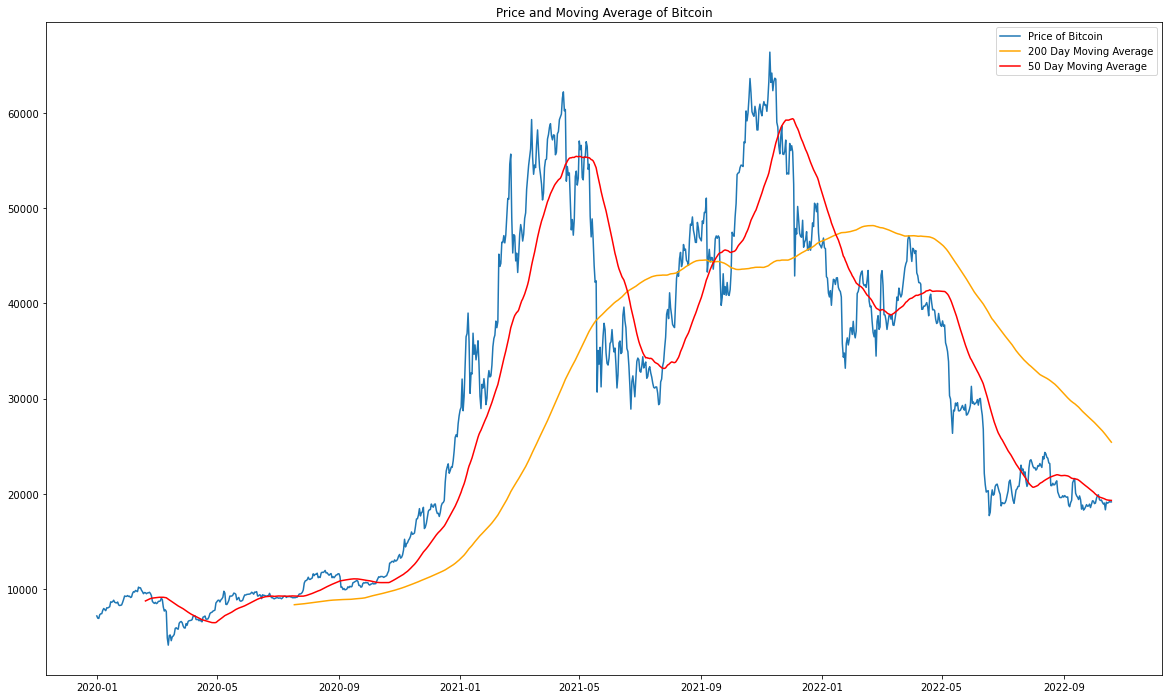

In [41]:
figure(figsize=(20,12))
btc=d['BTC-USD'].reset_index()
btc.rename(columns={'index':'Date','BTC-USD':'Price'}, inplace=True)
plt.plot(btc['Date'],btc['Price'],label='Price of Bitcoin')
plt.plot(btc['Date'],btc['Price'].rolling(200).mean(), color='orange', label='200 Day Moving Average')
plt.plot(btc['Date'],btc['Price'].rolling(50).mean(), color='red', label='50 Day Moving Average')
plt.title('Price and Moving Average of Bitcoin')
plt.legend()

In [42]:
btc.Price.rolling(200).mean()

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
1018    25950.065537
1019    25811.679053
1020    25680.593027
1021    25554.301172
1022    25421.151133
Name: Price, Length: 1023, dtype: float64

In [44]:
btc.Price.rolling(50).mean()

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
1018    19350.949375
1019    19334.517188
1020    19325.647578
1021    19316.527266
1022    19307.224531
Name: Price, Length: 1023, dtype: float64

In [47]:
btc.Price.tail(1)

1022    19152.503906
Name: Price, dtype: float64